In [1]:
import pandas as pd
import numpy as np

In [3]:
X = pd.read_csv('Train_Features.csv').iloc[:,1:]
y = pd.read_csv('Train_Target.csv').iloc[:,1]
X_test = pd.read_csv('Test_Features.csv').iloc[:,1:]

In [ ]:
X.head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,S-TEST,Percentile_ET,S-TEST*SCORE,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA
0,M,56.0,ICSE,58.0,ISC,Commerce,67.00,Management,0,NaN,0,0.0,0.0,65.28,Marketing & Finance,62,77,77
1,M,41.0,Others,51.0,Others,Science,61.00,Computer Applications,1,MAT,1,86.0,86.0,62.48,Marketing & Finance,59,72,75
2,F,53.0,Others,40.0,Others,Arts,54.00,Arts,1,MAT,1,65.0,65.0,56.11,Marketing & HR,54,66,75
3,M,59.0,Others,58.0,Others,Commerce,59.00,Management,0,G-MAT,1,0.0,0.0,59.81,Marketing & HR,53,66,78
4,F,61.5,Others,65.4,CBSE,Arts,67.93,Management,0,MAT,1,61.0,61.0,64.27,Marketing & Finance,69,69,61


In [ ]:
X.dtypes

,0
Gender,object
Percent_SSC,float64
Board_SSC,object
Percent_HSC,float64
Board_HSC,object
Stream_HSC,object
Percent_Degree,float64
Course_Degree,object
Experience_Yrs,int64
Entrance_Test,object


In [ ]:
print('Gender Distribution:')
print(X['Gender'].value_counts())
print(X_test['Gender'].value_counts())
print('########################################################')
print('Board SSC Distribution:')
print(X['Board_SSC'].value_counts())
print(X_test['Board_SSC'].value_counts())
print('########################################################')
print('Board HSC Distribution:')
print(X['Board_HSC'].value_counts())
print(X_test['Board_HSC'].value_counts())
print('########################################################')
print('Stream HSC Distribution:')
print(X['Stream_HSC'].value_counts())
print(X_test['Stream_HSC'].value_counts())
print('########################################################')
print('Course Degree Distribution:')
print(X['Course_Degree'].value_counts())
print(X_test['Course_Degree'].value_counts())
print('########################################################')
print('Entrance Test Distribution:')
print(X['Entrance_Test'].value_counts())
print(X_test['Entrance_Test'].value_counts())
print('########################################################')
print('Specialization_MBA Distribution:')
print(X['Specialization_MBA'].value_counts())
print(X_test['Specialization_MBA'].value_counts())

Gender Distribution:
Gender
M    204
F     96
Name: count, dtype: int64
Gender
M    60
F    31
Name: count, dtype: int64
########################################################
Board SSC Distribution:
Board_SSC
Others    154
CBSE       93
ICSE       53
Name: count, dtype: int64
Board_SSC
Others    47
ICSE      24
CBSE      20
Name: count, dtype: int64
########################################################
Board HSC Distribution:
Board_HSC
Others    191
CBSE       74
ISC        35
Name: count, dtype: int64
Board_HSC
Others    56
CBSE      22
ISC       13
Name: count, dtype: int64
########################################################
Stream HSC Distribution:
Stream_HSC
Commerce    168
Science     118
Arts         14
Name: count, dtype: int64
Stream_HSC
Commerce    54
Science     33
Arts         4
Name: count, dtype: int64
########################################################
Course Degree Distribution:
Course_Degree
Management               126
Commerce                  91
Compu

# Imbalance Ratio:

In [ ]:
print("The number of observations from the minority class (Rejected): %.0f" %y[y == 1].count())
print("The number of observations from the majority class (Accepted): %.0f" %y[y == 0].count())
print('The imbalance ratio is: %.3f' %(y[y == 1].count()/y[y == 0].count()))  # For every rejection, there are four acceptances.

The number of observations from the minority class (Rejected): 61
The number of observations from the majority class (Accepted): 239
The imbalance ratio is: 0.255


# Handling Missing Values:

In [ ]:
X[X.isna().any(axis = 1)].head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,S-TEST,Percentile_ET,S-TEST*SCORE,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA
0,M,56.0,ICSE,58.0,ISC,Commerce,67.00,Management,0,NaN,0,0.0,0.0,65.28,Marketing & Finance,62,77,77
17,M,52.5,Others,53.4,Others,Commerce,55.21,Management,1,NaN,0,0.0,0.0,72.00,Marketing & Finance,73,79,55
26,M,56.0,Others,42.0,ISC,Science,59.00,Computer Applications,2,NaN,0,0.0,0.0,51.48,Marketing & Finance,50,53,55
35,M,58.0,Others,54.5,Others,Commerce,49.85,Commerce,0,NaN,0,0.0,0.0,62.89,Marketing & Finance,55,67,73
37,M,58.0,ICSE,59.0,ISC,Commerce,56.00,Management,0,NaN,0,0.0,0.0,55.10,Marketing & Finance,50,57,50


In [4]:
mode_test = X['Entrance_Test'].mode()[0]
X.fillna({'Entrance_Test':mode_test}, inplace = True)

mode_X_test = X_test['Entrance_Test'].mode()[0]
X_test.fillna({'Entrance_Test':mode_X_test}, inplace = True)

In [5]:
print(X[X.isna().any(axis = 1)])
print(X_test[X_test.isna().any(axis = 1)])

Empty DataFrame
Columns: [Gender, Percent_SSC, Board_SSC, Percent_HSC, Board_HSC, Stream_HSC, Percent_Degree, Course_Degree, Experience_Yrs, Entrance_Test, S-TEST, Percentile_ET, S-TEST*SCORE, Percent_MBA, Specialization_MBA, Marks_Communication, Marks_Projectwork, Marks_BOCA]
Index: []
Empty DataFrame
Columns: [Gender, Percent_SSC, Board_SSC, Percent_HSC, Board_HSC, Stream_HSC, Percent_Degree, Course_Degree, Experience_Yrs, Entrance_Test, S-TEST, Percentile_ET, S-TEST*SCORE, Percent_MBA, Specialization_MBA, Marks_Communication, Marks_Projectwork, Marks_BOCA]
Index: []


# Encoding Categorical Variables

In [6]:
X['Gender'] = X['Gender'].map({'M':1, 'F': 0})
X_test['Gender'] = X_test['Gender'].map({'M':1, 'F': 0})

X_encoded = X
X_test_encoded = X_test

for col in {'Board_SSC', 'Board_HSC', 'Stream_HSC', 'Course_Degree', 'Entrance_Test', 'Specialization_MBA'}:
    X_encoded = pd.get_dummies(X_encoded, columns = [col])

for col in X_encoded.columns:
    if X_encoded[col].dtype == bool:
        X_encoded[col] = X_encoded[col].map({True: 1, False: 0})

for col in {'Board_SSC', 'Board_HSC', 'Stream_HSC', 'Course_Degree', 'Entrance_Test', 'Specialization_MBA'}:
    X_test_encoded = pd.get_dummies(X_test_encoded, columns = [col])

for col in X_test_encoded.columns:
    if X_test_encoded[col].dtype == bool:
        X_test_encoded[col] = X_test_encoded[col].map({True: 1, False: 0})

In [7]:
X_encoded.to_csv('New_Train_Features.csv', index = False)
X_test_encoded.to_csv('New_Test_Features.csv', index = False)

In [8]:
from google.colab import files

files.download('New_Train_Features.csv')
files.download('New_Test_Features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

X_standardized = X_encoded.copy()
X_test_standardized = X_test_encoded.copy()

scaler = StandardScaler()
numerical_columns = ['Gender', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree', 'Experience_Yrs','S-TEST', 'Percentile_ET', 'S-TEST*SCORE','Percent_MBA', 'Marks_Communication', 'Marks_Projectwork', 'Marks_BOCA']
X_standardized[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])
X_test_standardized[numerical_columns] = scaler.fit_transform(X_test_encoded[numerical_columns])

In [ ]:
X_standardized.to_csv('New_Train_Features_Full.csv', index = False)
X_test_standardized.to_csv('New_Test_Features_Full.csv', index = False)

In [ ]:
from google.colab import files

files.download('New_Train_Features_Full.csv')
files.download('New_Test_Features_Full.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Feature Selection

### Filter Method: Correlation

In [ ]:
!pip install xicorpy

In [ ]:
import xicorpy as xi

In [ ]:
xi_correlations = {}

for i in range(X_encoded.shape[1]):
    xi_correlations[i] = xi.compute_xi_correlation(X_encoded.iloc[:, i], y)

print("Chatterjee Correlations:")
print(xi_correlations)

Chatterjee Correlations:
{0:         Placement
Gender   0.084866, 1:              Placement
Percent_SSC   0.113765, 2:              Placement
Percent_HSC     0.0656, 3:                 Placement
Percent_Degree   0.046334, 4:                 Placement
Experience_Yrs   0.123398, 5:         Placement
S-TEST   0.094499, 6:                Placement
Percentile_ET   0.094499, 7:               Placement
S-TEST*SCORE   0.094499, 8:              Placement
Percent_MBA    0.16193, 9:                      Placement
Marks_Communication   0.113765, 10:                    Placement
Marks_Projectwork   0.084866, 11:             Placement
Marks_BOCA   0.017435, 12:                 Placement
Board_HSC_CBSE   0.123398, 13:                Placement
Board_HSC_ISC   0.094499, 14:                   Placement
Board_HSC_Others   0.075233, 15:                                         Placement
Specialization_MBA_Marketing & Finance   0.055967, 16:                                    Placement
Specialization_MBA_Ma

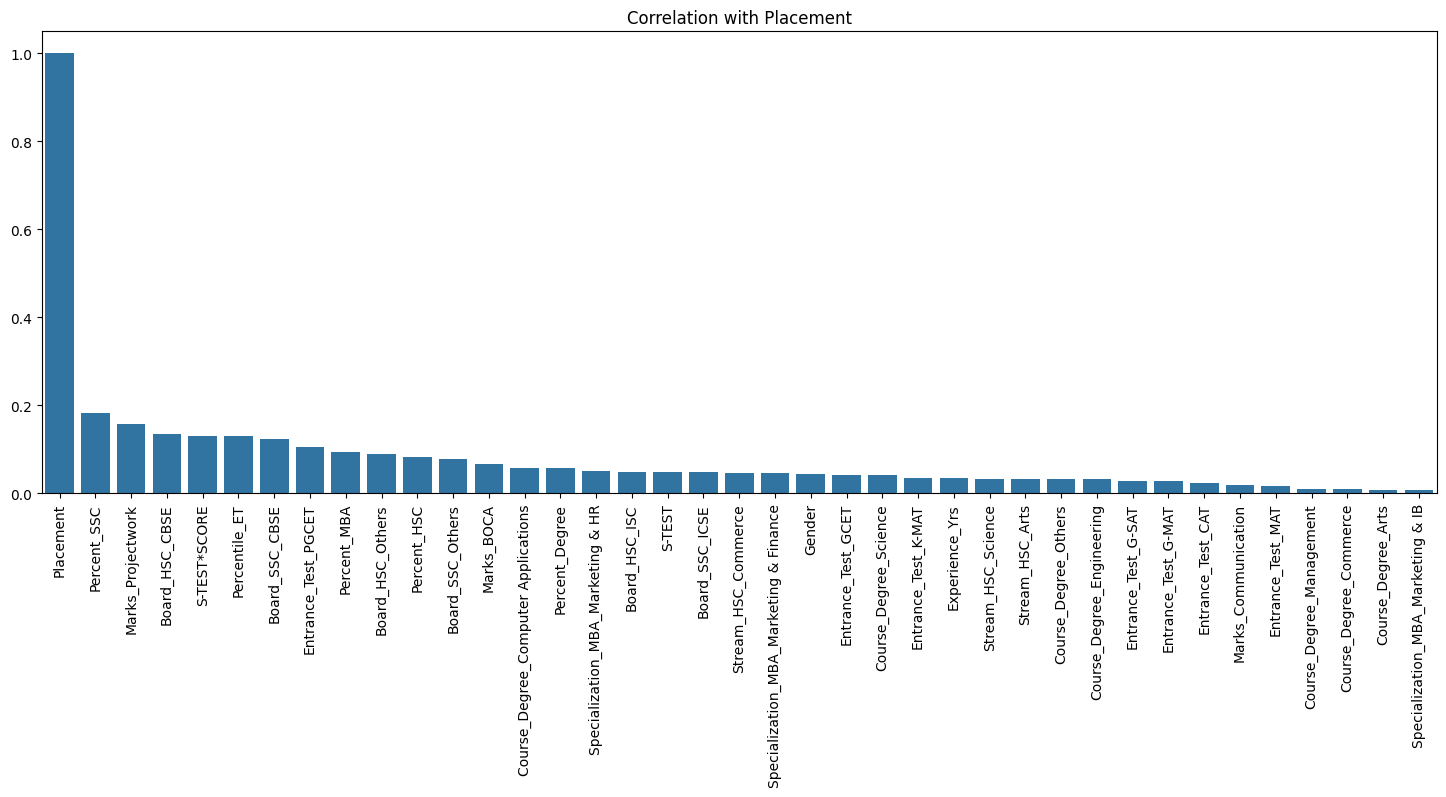

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.concat([X_encoded, y], axis = 1)
correlation = data.corr()['Placement'].abs().sort_values(ascending = False)

plt.figure(figsize = (18,6))
sns.barplot(x = correlation.index, y = correlation.values)
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('')
plt.title('Correlation with Placement')
plt.show()

### Filter Method: Chi Squared

In [ ]:
from sklearn.feature_selection import chi2

chi2_scores, p_values = chi2(X_encoded, y)
print(pd.Series(chi2_scores, index = X_encoded.columns).sort_values(ascending = False))

S-TEST*SCORE                              91.616182
Percentile_ET                             91.616182
Percent_SSC                               19.479691
Marks_Projectwork                          5.353672
Percent_HSC                                4.228684
Board_HSC_CBSE                             4.142385
Entrance_Test_PGCET                        3.259894
Board_SSC_CBSE                             3.169479
Marks_BOCA                                 1.919804
Percent_MBA                                1.466603
Percent_Degree                             1.303803
Course_Degree_Computer Applications        0.907127
Board_SSC_Others                           0.880485
Board_HSC_Others                           0.861672
Board_HSC_ISC                              0.625606
Board_SSC_ICSE                             0.575769
Entrance_Test_GCET                         0.510460
Specialization_MBA_Marketing & HR          0.484057
Course_Degree_Science                      0.474136
Entrance_Tes

### Wrapper Method: RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rfe = RFE(rf_model)
X_rfe = rfe.fit_transform(X_standardized, y)
print(f"Selected Features: {X_standardized.columns[rfe.support_].tolist()}")

Selected Features: ['Gender', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree', 'Experience_Yrs', 'Percentile_ET', 'S-TEST*SCORE', 'Percent_MBA', 'Marks_Communication', 'Marks_Projectwork', 'Marks_BOCA', 'Board_HSC_CBSE', 'Board_HSC_Others', 'Specialization_MBA_Marketing & Finance', 'Specialization_MBA_Marketing & HR', 'Stream_HSC_Commerce', 'Board_SSC_CBSE', 'Board_SSC_ICSE', 'Course_Degree_Management']


### Embedded Method: LASSO


In [ ]:
from sklearn.feature_selection import SelectFromModel

lasso_model = LogisticRegression(penalty = 'l1', solver = 'liblinear')
selector = SelectFromModel(lasso_model)
selector.fit(X_standardized, y)
selected_feature = X_standardized.columns[selector.get_support()].tolist()
print(f"Selected Features: {selected_features}")

Selected Features: ['Gender', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree', 'Experience_Yrs', 'Board_HSC_CBSE', 'Board_HSC_ISC', 'Board_HSC_Others', 'Specialization_MBA_Marketing & IB', 'Stream_HSC_Arts', 'Stream_HSC_Commerce', 'Stream_HSC_Science', 'Entrance_Test_CAT', 'Entrance_Test_G-MAT', 'Entrance_Test_G-SAT', 'Entrance_Test_GCET', 'Entrance_Test_K-MAT', 'Entrance_Test_PGCET', 'Board_SSC_ICSE']


### Wrapper Method: Forward Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

lr_model = LogisticRegression(solver = 'newton-cg')
selector = SequentialFeatureSelector(lr_model, direction = 'forward')
selector.fit(X_standardized, y)
selected_features = X_standardized.columns[selector.support_].tolist()
print(f"Selected Features: {selected_features}")

Selected Features: ['Gender', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree', 'Experience_Yrs', 'Board_HSC_CBSE', 'Board_HSC_ISC', 'Board_HSC_Others', 'Specialization_MBA_Marketing & IB', 'Stream_HSC_Arts', 'Stream_HSC_Commerce', 'Stream_HSC_Science', 'Entrance_Test_CAT', 'Entrance_Test_G-MAT', 'Entrance_Test_G-SAT', 'Entrance_Test_GCET', 'Entrance_Test_K-MAT', 'Entrance_Test_PGCET', 'Board_SSC_ICSE']
